# Import Libraries and style choices


This section is dedicated to reading in the files.

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns
from datetime import datetime
import matplotlib.gridspec as gridspec

**Stylistic Choices**

In [221]:
sns.set(style="darkgrid")

# another option = sns.set(style="ticks")

Color Palette template:
    
    https://seaborn.pydata.org/tutorial/color_palettes.html

In [181]:
# NOT SURE THIS IS WORKING BUT FOR FUTURE REFERENCE IF WE WANT TO ADJUST FONT THEMES, ETC

import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='/Users/hugo/Desktop/Playfair_Display/PlayfairDisplay-Regular.ttf', size=22)
subtitle_font = fm.FontProperties(
fname='/Users/hugo/Library/Fonts/Roboto-Regular.ttf', size=12)
# Color Themes
color_bg = '#FEF1E5'
lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'

# 1. Load Data, Merge Files, Fix the Date

this merges the Climate Declaration and NON Climate-Dec cities, as well as merges a table that identifies the accounts by City, type of department, and if the city has declared a CE. 

**Load files**

In [6]:
tweet = "Final Results.csv"
tweet = pd.read_csv(tweet)
tweet
len(tweet)

tweetsND = "Final Results ND.csv"
tweetsND = pd.read_csv(tweetsND)
tweetsND

accounts = "Case Study Accounts.csv"
accounts = pd.read_csv(accounts)


In [7]:
merged = pd.concat([tweet,tweetsND])

This merges the City Acconuts file, with info on type of dept, City, and CD (y/n)

In [8]:
# MERGED w/ City Accounts file

df = pd.merge(merged, accounts, on='user_ID', how='left')
len(df)

74049

**Fixes the date**

In [9]:
# ADD DATE IN generate result using pandas 
date = [] 
for x in df['time']: 
    data = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    date.append(data)
    
df["date"] = date   

#adds year column, makes it easier to group
df['year'] = pd.DatetimeIndex(df['date']).year

In [10]:
# CONVERTs TWEETs TO LOWER CASE FOR EASIER SEARCHING

#  BUTTTTT NOT NECESSARY INSTEAD JUST MAKE IT IF YOU use case=False 

'''CONVERT TWEET TO LOWER CASE FOR EASIER SEARCHING
# Series.str.lower
s = pd.Series(df.tweet)
lower = s.str.lower()
df['tweets'] = lower
df.head()
#len(s)
#df.str.lower()
#print(lower)'''

"CONVERT TWEET TO LOWER CASE FOR EASIER SEARCHING\n# Series.str.lower\ns = pd.Series(df.tweet)\nlower = s.str.lower()\ndf['tweets'] = lower\ndf.head()\n#len(s)\n#df.str.lower()\n#print(lower)"

# ~ ~ ~ ANALYSIS of the tweets ~  ~ ~ 

# 2. Total Tweets 

**Overall Likes By Department Type, Likes Per Tweet**

Text(0, 0.5, '')

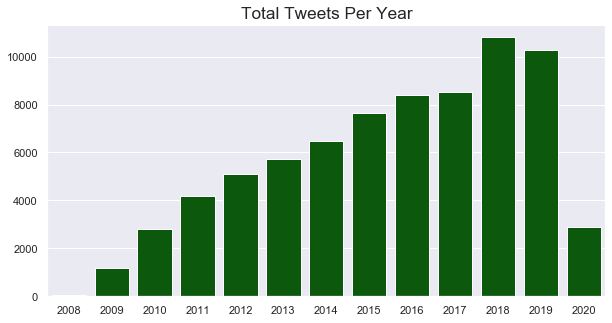

In [193]:
# Total Tweets per Year


#      HOW CAN I MAKE THIS A LINEPLOT?!?

plt.figure(figsize=(10,5))
tt= sns.countplot(data=df, x='year', color='darkgreen')
tt.set_title('Total Tweets Per Year',fontsize= 'x-large')
tt.set_xlabel("Year")
tt.set_xlabel('')
tt.set_ylabel('')

#make a simpler dataframe 

#groupby year then make new dataframe
#data frame - year, # of tweets, # of sustainability tweets; 
#tt.set_xticks([])
#tt.show()
# Put the legend out of the figure
#tt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

AxesSubplot(0.125,0.125;0.775x0.755)


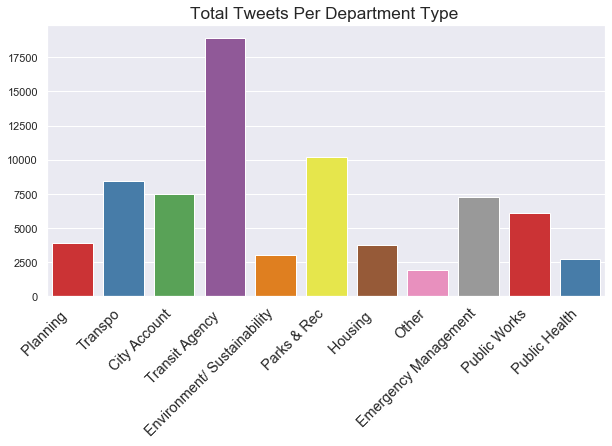

In [194]:
# Total Tweets per Department type

#dpt = sns.countplot(data=df, hue="Department", x='Department')
#dpt.set_title('Total Tweets Per Department Type ')
#dpt.set_xticks([])
#tt.set_xticklabels(labels, rotation=90)
#dpt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p rint(dpt)

plt.figure(figsize=(10,5))
dpt2 = sns.countplot(data=df, x='Department', palette='Set1')
dpt2.set_title('Total Tweets Per Department Type ', fontsize= 'x-large',)
dpt2.set_xticklabels(dpt2.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
dpt2.set_xlabel('')
dpt2.set_ylabel('')
print(dpt2)

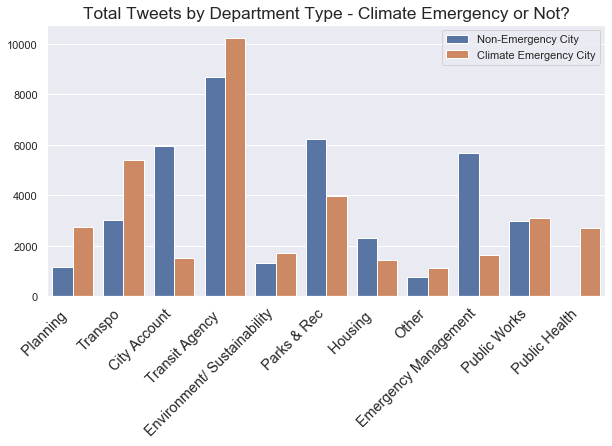

In [196]:
# Total Tweets by Cities that have and have not declared "Climate Emergency - by Department

plt.figure(figsize=(10,5))
ax = sns.countplot(x="Department", hue="Emergency", data=df)
ax.set_title('Total Tweets by Department Type - Climate Emergency or Not?', fontsize='x-large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])
ax

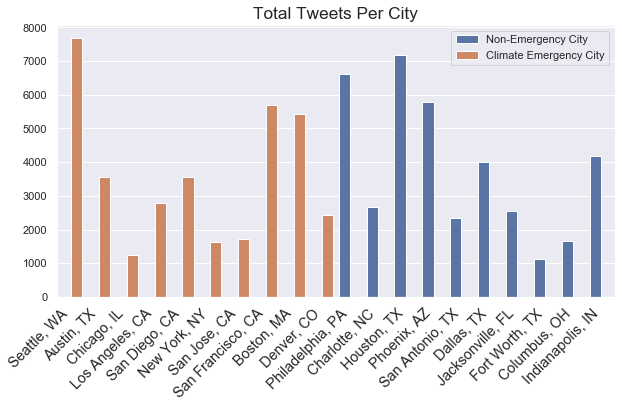

In [72]:
# Total Tweets per city 
plt.figure(figsize=(10,5))

tt= sns.countplot(data=df, x='City', hue="Emergency")
tt.set_title('Total Tweets Per City', fontsize= 'x-large')
tt.set_xticklabels(tt.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
tt.set_xlabel('')
tt.set_ylabel('')
plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])

Text(0, 0.5, '')

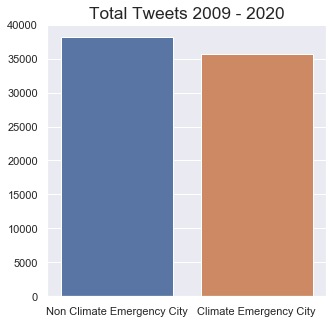

In [183]:
# Total Tweets by climate emergency

plt.figure(figsize=(5,5))
dpt = sns.countplot(data=df, x='Emergency')
dpt.set_title('Total Tweets 2009 - 2020', fontsize="x-large")
dpt.set_xticklabels(["Non Climate Emergency City","Climate Emergency City"])
#dpt.set_xticks('Climate Emergency City', "Non Climate Emergency")
#tt.set_xticklabels(labels, rotation=90)
#dpt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dpt.set_xlabel('')
dpt.set_ylabel('')

In [ ]:
# tweets per city over time (stripplot )

## SOMETHING GOING ON WITH THIS ONE!!! wwhhyyyy 


plt.figure(figsize=(10,5))
ax = sns.stripplot(x='year', y='City', hue="Emergency", data=df)
ax.set_title('Tweets Over Time By City')
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontweight='light',
    fontsize='large')
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc=2, labels = ["Non-Emergency City","Climate Emergency City"])
#jitter=0.001, linewidth=.5
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()



# NOW AS SWARMPLOT
plt.figure(figsize=(10,5))
ax = sns.swarmplot(x='year', y='City', hue="Emergency", data=df)
ax.set_title('Tweets Over Time By City')
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontweight='light',
    fontsize='large')
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc=2, labels = ["Non-Emergency City","Climate Emergency City"])

#jitter=0.001, linewidth=.5
#plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])

C:\Users\brown\Anaconda2\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0, 0, 'Planning '),
 Text(0, 0, 'Transpo'),
 Text(0, 0, 'City Account'),
 Text(0, 0, 'Transit Agency '),
 Text(0, 0, 'Environment/ Sustainability'),
 Text(0, 0, 'Parks & Rec'),
 Text(0, 0, 'Housing '),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Emergency Management'),
 Text(0, 0, 'Public Works'),
 Text(0, 0, 'Public Health')]

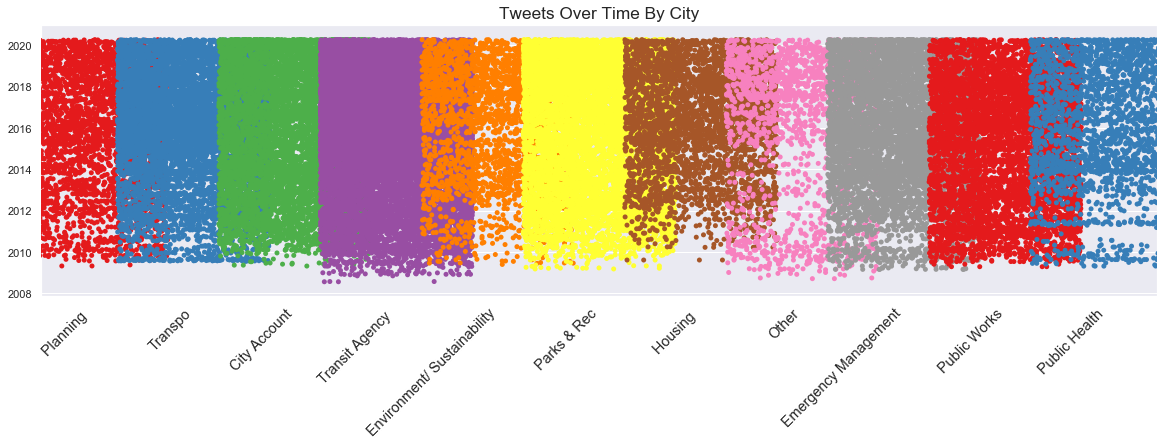

In [18]:
# tweets per city over time (stripplot )

plt.figure(figsize=(20,5))
ax = sns.stripplot(x='Department', y='date', jitter=.75,data=df, palette='Set1')

ax.set_title('Tweets Over Time By City', fontsize="x-large")
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')


# 3. Tweets About Climate Change 

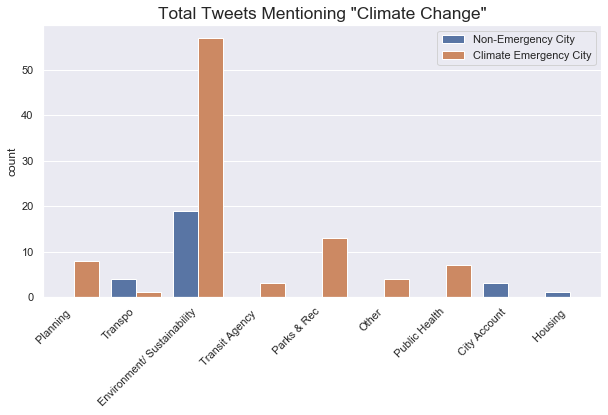

In [197]:
# Total Tweets Mentioning Climate Change by Cities that have and have not declared "Climate Emergency - by Department


plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]
ax = sns.countplot(x="Department", hue="Emergency", data=cc)
ax.set_title('Total Tweets Mentioning "Climate Change"',fontsize= 'x-large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.set_xlabel('')

plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])


#plt.legend(title="", loc="upper right", labels = ["Climate Emergency City", "Non-Emergency City"])

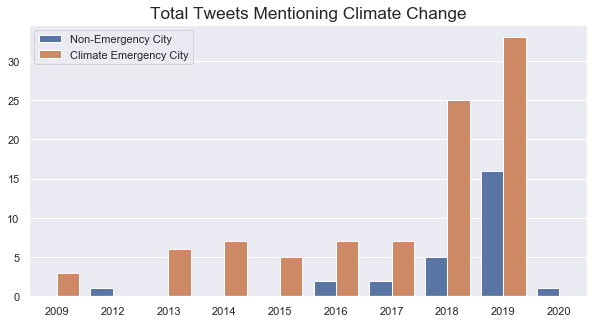

In [202]:
# Total Tweets per Year

plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]
tt= sns.countplot(data=cc, hue="Emergency", x='year')
tt.set_title('Total Tweets Mentioning Climate Change',fontsize= 'x-large')
tt.set_ylabel("")
tt.set_xlabel("")
#tt.set_xticks([])
#tt.show()
plt.legend(title="", loc="upper left", labels = ["Non-Emergency City","Climate Emergency City"])

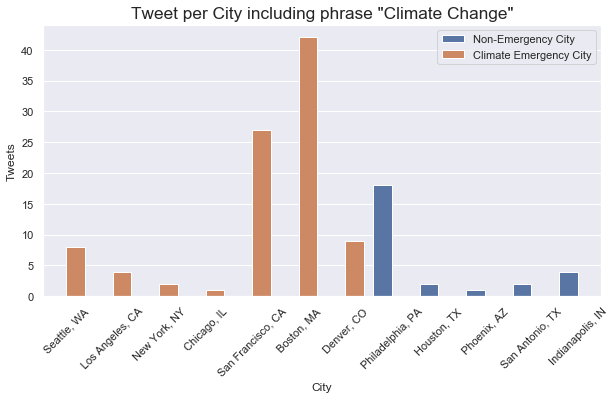

In [201]:
# Tweets Per City Containing Climate Change

plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]
ax = sns.countplot(data=cc, hue="Emergency", x='City')
#ax.set_xticklabels(labels= x, rotation=90)
ax.set_ylabel('Tweets')
ax.set_title('Tweet per City including phrase "Climate Change"',fontsize= 'x-large')
#ax.set_xticks(x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.legend()
plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])

**Stripplot Versions**

Text(0, 0.5, '')

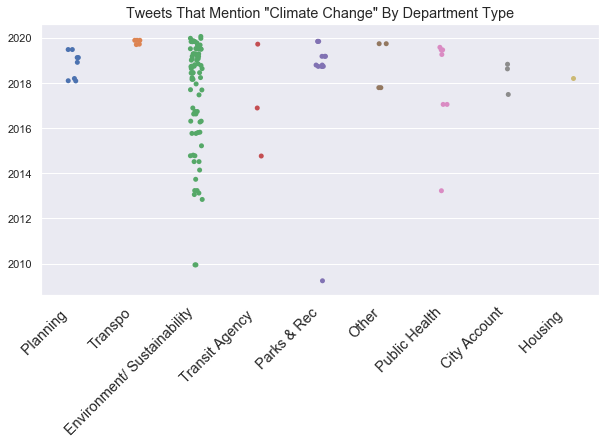

<Figure size 720x360 with 0 Axes>

In [222]:
# total CC tweets by dept type over time (stripplot)


plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change', case=False))]
ax = sns.stripplot(x='Department', y='date', data=cc)

plt.figure(figsize=(10,5))
ax.set_title('Tweets That Mention "Climate Change" By Department Type', fontsize="large")
#ax.set_xticklabels("City")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('')
ax.set_ylabel('')

#plt.show()

Text(0, 0.5, '')

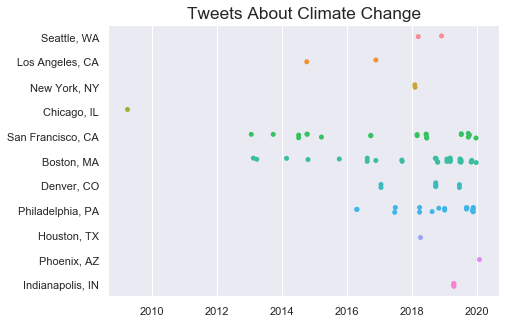

In [32]:
# tweets about CC per city over time? 

plt.figure(figsize=(7,5))
cc = df.loc[(df['tweet'].str.contains('climate change'))]
ax = sns.stripplot(y='City', x='date', data=cc)

ax.set_title('Tweets About Climate Change', fontsize= 'x-large')
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_ylabel('')
#ax.set_xticks([])
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.show()

In [ ]:
#Can't do a LINE PLOT b/c "TWEET" is not numerical

ax = sns.lineplot(x="tweet", y="date", data=df)

# Tweets about other related topics

**Identify the Key Words in "Environmentalism"** 

In [206]:
#Different key words over time 

# climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | 
# sustainable | sustainability | green | carbon | emissions

words = ["climate", "climate change", "global warming","sea level rise", "greenhouse gas", "emissions", 
         "resilience", "sustainable", 
         "sustainability", "green", "carbon", "environmental justice", "pollution", "environmental"]
words


['climate',
 'climate change',
 'global warming',
 'sea level rise',
 'greenhouse gas',
 'emissions',
 'resilience',
 'sustainable',
 'sustainability',
 'green',
 'carbon',
 'environmental justice',
 'pollution',
 'environmental']

**"Environmentalism" - all the key words grouped together**

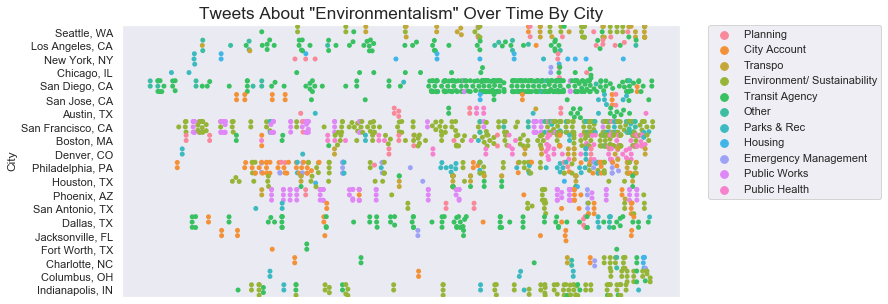

In [210]:
#Tweets About Sustainability Over Time By City

plt.show()
plt.figure(figsize=(10,5))
df_s = df.loc[(df['tweet'].str.contains('climate | climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | environmental justice | pollution | environmental',
                                       case=False))]
ax = sns.swarmplot(x='date', y='City', data=df_s, hue="Department")
ax.set_title('Tweets About "Environmentalism" Over Time By City',fontsize= 'x-large',)
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_xticks([])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#plt.show()
# df = pd.DataFrame(['hello', 'world', 'hehe'], columns=['words'])

#df.loc[(df['tweets'].str.count("climate change|wo"))]

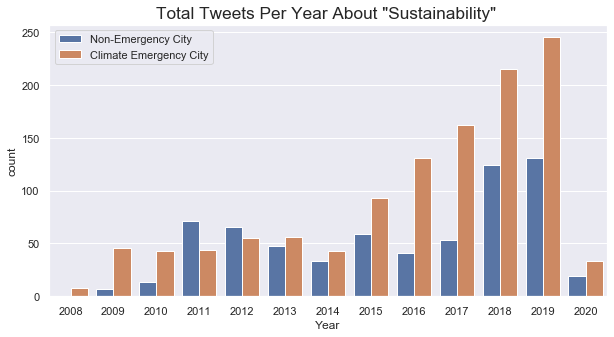

In [211]:
plt.figure(figsize=(10,5))
df_s = df.loc[(df['tweet'].str.contains('climate | climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | environmental justice | pollution | environmental',
                                       case=False))]
tt= sns.countplot(data=df_s, hue="Emergency", x='year')
tt.set_title('Total Tweets Per Year About "Sustainability" ',fontsize= 'x-large')
tt.set_xlabel("Year")
#tt.set_xticks([])
#tt.show()
plt.legend(title="", loc="upper left", labels = ["Non-Emergency City","Climate Emergency City"])

**Comparing Different Words**



Creating Dummy Variables for "tweet contains _____"

In [212]:
# For LOOP To make dummies of all the words w/COLUMNS YES !!! 

contains = []
for i in words:
    df[i] = df['tweet'].str.contains(i, case=False, regex=True).astype(int) 
    contains.append(df[i])
    
# contains IS THE NEW DATAFRAME WITH DUMMIES FOR EACH WORD

copy = df[words].copy()
copy = copy.sum(axis=0) 
copy.astype

<bound method NDFrame.astype of climate                   480
climate change            120
global warming              3
sea level rise             16
greenhouse gas             28
emissions                 122
resilience                 65
sustainable               167
sustainability            207
green                    2064
carbon                    144
environmental justice      12
pollution                  81
environmental             219
dtype: int64>

Text(0.5, 1.0, 'Total Tweets Containing...')

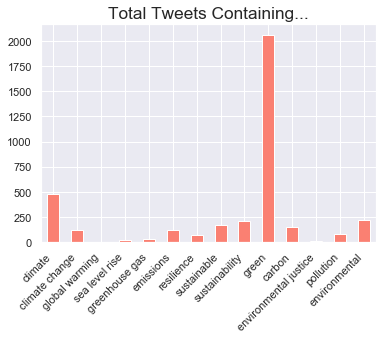

<Figure size 720x360 with 0 Axes>

In [214]:
ax = copy.plot.bar(color="salmon")

plt.figure(figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

ax.set_title('Total Tweets Containing...', fontsize='x-large')

In [216]:
# Groupiing all the dummy variables by City & Department 
df_grp = df.groupby(['City', 'Department', "year"])[words].sum().reset_index()
df_grp2 = df.groupby(['City'])[words].sum().reset_index()
df_grp2

,City,climate,climate change,global warming,sea level rise,greenhouse gas,emissions,resilience,sustainable,sustainability,green,carbon,environmental justice,pollution,environmental
0,"Austin, TX",0,0,0,0,3,1,0,2,3,38,4,0,4,5
1,"Boston, MA",176,42,0,9,5,32,20,14,8,247,62,1,7,20
2,"Charlotte, NC",7,0,0,0,1,5,0,7,17,20,3,0,1,2
3,"Chicago, IL",3,1,0,0,0,0,0,1,3,35,1,0,0,0
4,"Columbus, OH",12,0,0,0,0,0,0,12,5,39,0,0,0,13
5,"Dallas, TX",4,0,0,0,0,0,1,1,1,103,0,0,2,8
6,"Denver, CO",35,9,0,0,1,6,0,11,10,60,1,0,2,25
7,"Fort Worth, TX",0,0,0,0,0,0,0,0,0,7,0,0,4,0
8,"Houston, TX",6,2,0,0,0,0,0,6,3,133,0,0,1,1
9,"Indianapolis, IN",21,4,0,0,0,3,4,19,39,83,3,0,18,6


In [217]:
df_grp2['climate change']
df_grp2.City

0            Austin, TX
1            Boston, MA
2         Charlotte, NC
3           Chicago, IL
4          Columbus, OH
5            Dallas, TX
6            Denver, CO
7        Fort Worth, TX
8           Houston, TX
9      Indianapolis, IN
10     Jacksonville, FL
11      Los Angeles, CA
12         New York, NY
13     Philadelphia, PA
14          Phoenix, AZ
15      San Antonio, TX
16        San Diego, CA
17    San Francisco, CA
18         San Jose, CA
19          Seattle, WA
Name: City, dtype: object

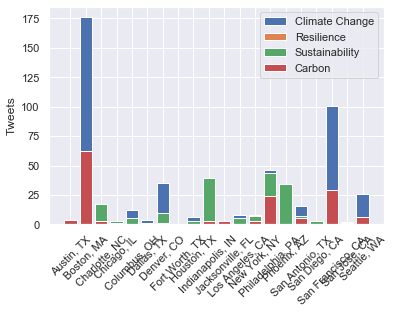

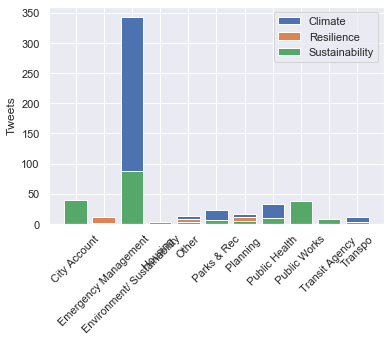

In [218]:
# create a line plot for the first class
# label this line as class one for the legend
plt.bar(df_grp2.City, df_grp2['climate'], label = "Climate Change")
plt.xticks(rotation=45)

# create a line plot for the second class
# label this line as class two for the legend
plt.bar(df_grp2.City, df_grp2.resilience, label = "Resilience")
plt.bar(df_grp2.City, df_grp2.sustainability, label = "Sustainability")
plt.bar(df_grp2.City, df_grp2.carbon, label = "Carbon")

#    GREEN MAKES IT HARD TO SEE THE OTHERS
#plt.bar(df_grp2.City, df_grp2.green, label = "green")


# add the x-axis label
plt.xlabel('')
# add the y-axis label
plt.ylabel("Tweets")
# add the legend
plt.legend()
# add the title
plt.title("")
# show the plot
plt.show()


# create a line plot for the first class
# label this line as class one for the legend
plt.bar(df_grp3.Department, df_grp3.climate, label = "Climate")
plt.xticks(rotation=45)

# create a line plot for the second class
# label this line as class two for the legend
plt.bar(df_grp3.Department, df_grp3.resilience, label = "Resilience")

plt.bar(df_grp3.Department, df_grp3.sustainability, label = "Sustainability")

#    GREEN MAKES IT HARD TO SEE THE OTHERS
#plt.bar(df_grp2.City, df_grp2.green, label = "green")


# add the x-axis label
plt.xlabel('')
# add the y-axis label
plt.ylabel("Tweets")
# add the legend
plt.legend()
# add the title
plt.title("")
# show the plot
plt.show()

AttributeError: 'Figure' object has no attribute 'loose_layout'

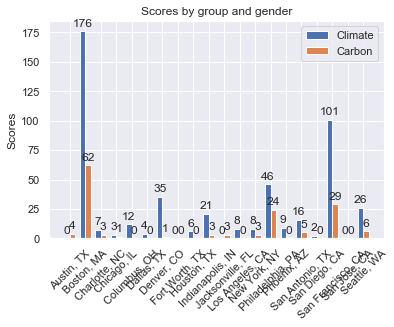

In [155]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df_grp2['City']
men_means = df_grp2['climate']
women_means = df_grp2['carbon']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Climate')
rects2 = ax.bar(x + width/2, women_means, width, label='Carbon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.loose_layout()
#plt.subplots(constrained_layout=True)

plt.show()

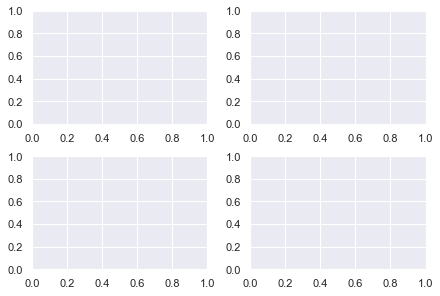

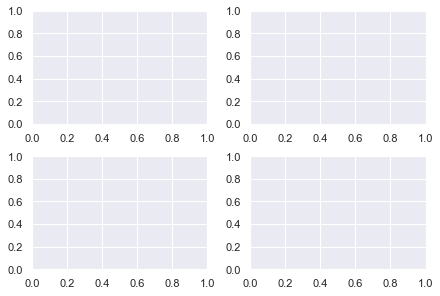

In [165]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)


fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

In [110]:
#sns.catplot(x="City", y= ["climate"], kind="bar", data=df_grp2)

In [111]:
df_grp3 = df.groupby(['Department'])[words].sum().reset_index()
df_grp3

,Department,climate,climate change,global warming,sea level rise,greenhouse gas,emissions,resilience,sustainable,sustainability,green,carbon
0,City Account,29,3,0,2,1,6,3,13,39,125,4
1,Emergency Management,3,0,0,0,0,0,11,0,1,18,24
2,Environment/ Sustainability,343,76,2,5,16,65,23,71,88,478,71
3,Housing,3,1,0,0,0,3,3,1,4,47,3
4,Other,14,4,0,5,0,23,8,0,3,57,0
5,Parks & Rec,23,13,0,2,0,6,4,2,7,231,4
6,Planning,17,8,0,2,0,0,11,14,5,86,2
7,Public Health,33,7,0,0,3,7,1,11,10,54,30
8,Public Works,0,0,0,0,4,4,0,40,38,212,0
9,Transit Agency,3,3,1,0,4,5,1,6,9,590,2


In [ ]:
#TRYING TO OVERLAP WORDS! 
    
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

# Likes per tweet stuff

In [195]:
# Overall likes per tweet by Department

likes = df.groupby("Department").likes
print(likes)

#per_d.plot.scatter('count', 'mean')
#sns.relplot(x="count", y="mean", data=likes);
likes.describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
City Account,7488.0,9.099493,104.739806,0.0,0.0,1.0,6.0,7369.0
Emergency Management,7308.0,4.011905,15.717309,0.0,0.0,1.0,3.0,853.0
Environment/ Sustainability,3029.0,2.709475,6.370350,0.0,0.0,1.0,3.0,190.0
Housing,3769.0,2.208543,4.058231,0.0,0.0,1.0,3.0,88.0
Other,1906.0,3.040923,5.942719,0.0,0.0,1.0,4.0,85.0
Parks & Rec,10216.0,3.452134,13.888884,0.0,0.0,1.0,4.0,642.0
Planning,3928.0,1.513238,3.732912,0.0,0.0,0.0,2.0,98.0
Public Health,2730.0,1.818681,7.932041,0.0,0.0,0.5,2.0,253.0
Public Works,6084.0,2.543064,17.449270,0.0,0.0,0.0,2.0,792.0


In [ ]:
# NEEDS WORK

# df['pct_change'] = 100*(df['2019-12']-df['2014-12'])/df['2014-12']

likes per tweet 

df['likes_per'] = 

100*(df['2019-12']-df['2014-12'])/df['2014-12']

per_city = df.groupby("City").likes.describe()
print(per_city)
per_city.plot.scatter('count', 'mean')
sns.relplot(x="count", y="mean", data=per_city);

Text(0.5, 1.0, 'Total Likes and Replies to Tweets Mentioning Climate Change')

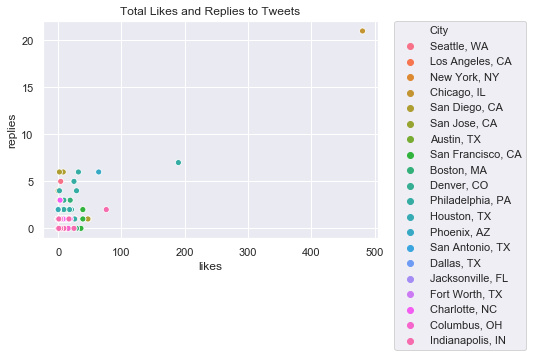

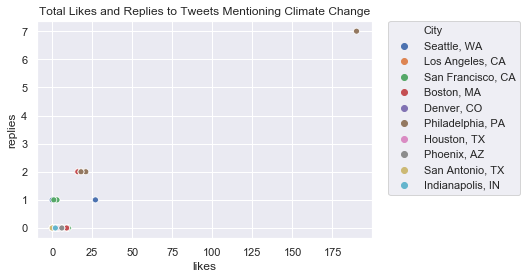

In [147]:
#are people replying or like more by department? 

plt.figure()
ax = sns.scatterplot(x="likes", y="replies", hue= "City", data=df)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Total Likes and Replies to Tweets')


plt.figure()
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))] 
c = sns.scatterplot(x="likes", y="replies", hue="City", data=cc)
c.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
c.set_title('Total Likes and Replies to Tweets Mentioning Climate Change')


Text(0.5, 1.0, 'Total Likes and Replies to Tweets Mentioning Climate Change')

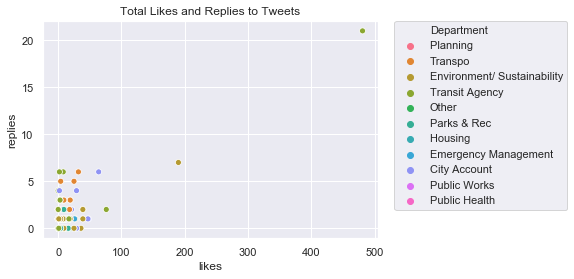

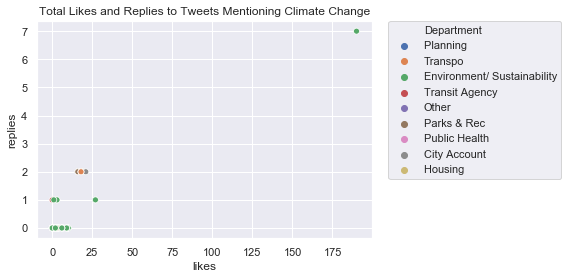

In [148]:

plt.figure()
ax = sns.scatterplot(x="likes", y="replies", hue="Department", data=df)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Total Likes and Replies to Tweets')


plt.figure()
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))] 
c = sns.scatterplot(x="likes", y="replies", hue="Department", data=cc)
c.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
c.set_title('Total Likes and Replies to Tweets Mentioning Climate Change')


# TRYING TO COMPARE USE OF DIFFERENT WORDS

In [12]:
grp = df.groupby(['City','Department'])
grp_count = grp.count()
grp_count
grp_count_series  = grp_count.iloc[:,3]
grp_count_series["climate change"]  = grp_count_series[1]

grp_count_series

City            Department                 
Austin, TX      Emergency Management            273
                Housing                         202
                Parks & Rec                     248
                Planning                        538
                Public Health                   359
                                               ... 
Seattle, WA     Environment/ Sustainability     152
                Planning                        414
                Transit Agency                 4193
                Transpo                        2729
climate change                                  202
Name: tweet, Length: 126, dtype: int64

In [248]:
df['sum'] = df.apply(lambda x: x.str.contains('climate change'), axis=1).sum(axis=1)
df['sum']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
74044    0.0
74045    0.0
74046    0.0
74047    0.0
74048    0.0
Name: sum, Length: 74049, dtype: float64

In [ ]:
# Make a new data frame - divide number of tweets by number of accounts 


buildings.loc[buildings.stories<7].groupby('stories').residential_units.describe()

data = pd.DataFrame({"x": [1.4, 5.98, 12, 0.0], "y": [17, 40, 52, 0]})

df['rent'] = df['2019-12']  # we only care about the most recent values
df['region'] = df['RegionName']
df['ranking'] = df['SizeRank']

df["percent_change"] = (df["2014-12"] - df["2019-12"])/ df["2014-12"]
rent_change = df[["region", "percent_change"]]
rent_change

In [ ]:
groupped_data = df.groupby(['week', 'day']).agg({'sales': 'sum'})
groupped_data["%"] = groupped_data.apply(lambda x:  100*x / x.sum())
groupped_data                 
df["resilience"] = df.loc[(df['tweets'].str.contains('climate change',case=False))]

cc= df.loc[(df['tweets'].str.contains('climate change'))]
cc = len(cc)
cc

grp = df.groupby(['City', 'Department'])
grp.describe()


cc = df.loc[(df['tweets'].str.contains('climate change'))]
grp = cc.groupby(['City', 'Department'])
grp.describe()

data = pd.DataFrame()
data["City"] = 

# Random stuff to use later 

not functional yet

In [ ]:
# created binary variables - does the tweet mention climate change? sustainability? etc. and then set that up 

# create function to run each word to make dummy variable

# HAHAHA THIS WORKS!!?!? 

df['climate'] = df['tweet'].str.contains('climate change', case=False, regex=True).astype(int) 
df['climate']

df['resilience'] = df['tweet'].str.contains('resilience', case=False, regex=True).astype(int) 
df['resilience']


df


In [ ]:
# buildings.loc[buildings.stories<7].groupby('stories').year_built.describe()# buildings.loc[buildings.stories<7].groupby('stories').year_built.describe()

In [ ]:
# GETTING DUMMIES FOR EACH DEPARTMENT (not actually necessary but example of how to auto-make dummy variables)

pd.get_dummies(df.Department, prefix = "Dep").iloc[:,1:]

In [ ]:
data = trips.loc[(trips['mode'] == 2) &  # bicycle trips
                 (trips.trip_distance_miles <= 10)]

# Note that a distplot takes a Series directly, rather than a DataFrame + colnames
ax = sns.distplot(a=data.trip_distance_miles)

ax.set_title('Distance of bicycle trips in California')
plt.show()

In [ ]:
cty = cc.groupby("City")
ax = sns.countplot(x='user_ID', data=cty)
ax.set_xticklabels(rotation=90)
plt.show()

In [ ]:
df.plot(x= count('tweet'), y= 'date')

In [ ]:
# Total tweets over time


tot= sns.countplot(data=df, x='City')
tt.set_title('Total Tweets Per City')
#tt.set_xticklabels(labels, rotation=90)
plt.show()


data = df.loc[(df['C'] == 2) &  # bicycle trips
                 (trips.trip_distance_miles <= 10)]

data = trips.loc[(trips['mode'] == 2) &  # bicycle trips
                 (trips.trip_distance_miles <= 10)]

# Note that a distplot takes a Series directly, rather than a DataFrame + colnames
ax = sns.distplot(a=data.trip_distance_miles)

ax.set_title('Distance of bicycle trips in California')
plt.show()




#data = df.loc[("Climate Emergency?" = 1)]

ax = sns.kdeplot(data.loc[data['City']].trip_distance_miles, 
                 color = 'orange', 
                 label = 'walking trips')

# Additional plots will show up on the same axes by default
ax = sns.kdeplot(data.loc[data['mode']==2].trip_distance_miles, 
                 color = 'olive',
                 label = 'bicycling trips')

ax = sns.kdeplot(data.loc[data['mode']==15].trip_distance_miles, 
                 color = 'midnightblue',
                 label = 'bus trips')

ax.set_xlim(-.1,5)
ax.set_xlabel('miles')
ax.set_yticks([])
ax.set_title('Distance distribution of trips by mode')
plt.show()






data = trips.loc[(trips.trip_distance_miles <= 5)]

ax = sns.kdeplot(data.loc[data['mode']==1].trip_distance_miles, 
                 color = 'orange', 
                 label = 'walking trips')

# Additional plots will show up on the same axes by default
ax = sns.kdeplot(data.loc[data['mode']==2].trip_distance_miles, 
                 color = 'olive',
                 label = 'bicycling trips')

ax = sns.kdeplot(data.loc[data['mode']==15].trip_distance_miles, 
                 color = 'midnightblue',
                 label = 'bus trips')

ax.set_xlim(-.1,5)
ax.set_xlabel('miles')
ax.set_yticks([])
ax.set_title('Distance distribution of trips by mode')
plt.show()